<a href="https://colab.research.google.com/github/BaburShahbaz/Pandas/blob/main/01_249242_005_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Brief Explaination of Assignment:**
Text Classification for Political Affiliation

In [75]:
# Import Libraries
import collections
import string
import numpy as np
import sklearn
import sklearn.feature_extraction
import sklearn.svm
import sklearn.metrics
import re
import matplotlib.pyplot as plt
import pandas as pd

**Text Processing**
first task is to fill in the following function which processes and tokenizes raw text. You will need to preprocess the tokens by applying the operators in the following order.

In [76]:
# load 1st dataset
a="/content/tweets_test.csv"
tweet_test=pd.read_csv(a)
tweet_test


,text
0,A comprehensive look at the many lies and offe...
1,Horrible killing of a 13 year old American gir...
2,"""I’m here as a proud American, a proud Democra..."
3,The Republican candidates on making the econom...
4,Great way to start my day -skyped with Madison...
...,...
995,Obama's Cuba trip is a historic mistake: https...
996,RT @GovPenceIN: Rick Hite is a man of integrit...
997,YOU can become a card-holding Sustaining Membe...
998,CODEL was in Erbil yesterday. Met w/Kurdistan ...


In [77]:
# load 2nd dataset
b="/content/tweets_train.csv"
tweet_train=pd.read_csv(b)
tweet_train

,screen_name,text
0,GOP,RT @GOPconvention: #Oregon votes today. That m...
1,TheDemocrats,RT @DWStweets: The choice for 2016 is clear: W...
2,HillaryClinton,Trump's calling for trillion dollar tax cuts f...
3,HillaryClinton,.@TimKaine's guiding principle: the belief tha...
4,timkaine,Glad the Senate could pass a #THUD / MilCon / ...
...,...,...
17293,mike_pence,RT @GovPenceIN: Casting a line w/ @FirstLadyIN...
17294,mike_pence,RT @Indiana_EDC: #Indiana is at record employm...
17295,mike_pence,RT @Indiana_EDC: Indy will have a different sk...
17296,HillaryClinton,Tune in now to watch @JoeBiden hit the trail f...


**Q1 Preprocessing**

first task is to fill in the following function which processes and tokenizes raw text. You will need to preprocess the tokens by applying the operators in the following order.

Convert the text to lower case.
Remove any URLs, which in this case will all be of the form http://t.co/<alphanumeric characters>.
Remove all trailing 's characters, followed by other apostrophes:
remove trailing 's: Children's becomes children
omit other apostrophes: don't becomes dont
Remove all non-alphanumeric (i.e., A-Z, a-z, 0-9) characters (replacing them with a single space)
Split the remaining text by whitespace into an array of individual words
Discard empty strings (i.e., if the string after processing above is equal to ""), return an empty array [] rather than ['']

In [78]:
import re

def preprocess(text):

    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http://t\.co/\w+", "", text)

    # Remove trailing 's and other apostrophes
    text = re.sub(r"'s\b", "", text)
    text = re.sub(r"'", "", text)

    # Replace non-alphanumeric characters with a space
    text = re.sub(r"[^a-z0-9\s]", " ", text)

    # Split into words and discard empty strings
    tokens = [word for word in text.split() if word]
    return tokens

# Load CSV files
tweet_test = pd.read_csv("/content/tweets_test.csv")
tweet_train = pd.read_csv("/content/tweets_train.csv")

# Apply preprocessing to the 'text' column
tweet_test['processed_text'] = tweet_test['text'].apply(preprocess)
tweet_train['processed_text'] = tweet_train['text'].apply(preprocess)

# Output the processed data
print(tweet_test[['processed_text']])
print(tweet_train[['screen_name', 'text', 'processed_text']])


                                        processed_text
0    [a, comprehensive, look, at, the, many, lies, ...
1    [horrible, killing, of, a, 13, year, old, amer...
2    [i, m, here, as, a, proud, american, a, proud,...
3    [the, republican, candidates, on, making, the,...
4    [great, way, to, start, my, day, skyped, with,...
..                                                 ...
995  [obama, cuba, trip, is, a, historic, mistake, ...
996  [rt, govpencein, rick, hite, is, a, man, of, i...
997  [you, can, become, a, card, holding, sustainin...
998  [codel, was, in, erbil, yesterday, met, w, kur...
999  [be, a, voter, check, your, registration, and,...

[1000 rows x 1 columns]
          screen_name                                               text  \
0                 GOP  RT @GOPconvention: #Oregon votes today. That m...   
1        TheDemocrats  RT @DWStweets: The choice for 2016 is clear: W...   
2      HillaryClinton  Trump's calling for trillion dollar tax cuts f...   
3      Hill

**Q2 Loading Data**


Using this preprocess function, load the data from the relevant csv files and return a list of the parsed tweets, plus a flag indicating whether or not the tweet is from a republican (i.e., one of the three usernames mentioned above); for the test data, where no screen name is given, provide None as the flag). Note that this function should take less than a second if you've implemented the above preprocessing function efficiently.

In [79]:
import csv

def read_data():
    def process_file(filename, has_label):
        data = []
        with open(filename, 'r') as f:
            reader = csv.DictReader(f)
            for row in reader:
                label = None
                if has_label:
                    label = row['screen_name'] in ["realDonaldTrump", "mike_pence", "GOP"]
                tokens = preprocess(row['text'])
                data.append((label, tokens))
        return data

    data_train = process_file("tweets_train.csv", True)
    data_test = process_file("tweets_test.csv", False)
    return data_train, data_test

# Call the function and print the results
train_data, test_data = read_data()

# Print the first 5 elements of each dataset
print("Training data:")
for i in range(5):
    print(train_data[i])

print("\nTest data:")
for i in range(5):
    print(test_data[i])

Training data:
(True, ['rt', 'gopconvention', 'oregon', 'votes', 'today', 'that', 'means', '62', 'days', 'until', 'the', 'gopconvention', 'https', 't', 'co', 'ooh9fvb7qs'])
(False, ['rt', 'dwstweets', 'the', 'choice', 'for', '2016', 'is', 'clear', 'we', 'need', 'another', 'democrat', 'in', 'the', 'white', 'house', 'demdebate', 'wearedemocrats'])
(False, ['trump', 'calling', 'for', 'trillion', 'dollar', 'tax', 'cuts', 'for', 'wall', 'street', 'it', 'time', 'for', 'them', 'to', 'pay', 'their', 'fair', 'share', 'https', 't', 'co', 'y8vyesioes'])
(False, ['timkaine', 'guiding', 'principle', 'the', 'belief', 'that', 'you', 'can', 'make', 'a', 'difference', 'through', 'public', 'service', 'https', 't', 'co', 'yopsuemqox'])
(False, ['glad', 'the', 'senate', 'could', 'pass', 'a', 'thud', 'milcon', 'vetaffairs', 'approps', 'bill', 'with', 'solid', 'provisions', 'for', 'virginia', 'https', 't', 'co', 'nxigrc3hdi'])

Test data:
(None, ['a', 'comprehensive', 'look', 'at', 'the', 'many', 'lies', 'a

**B. Feature Construction**
The next step is to derive feature vectors from the tokenized tweets. In this section, you will be constructing a bag-of-words TF-IDF feature vector.

**Q3 Word distributions**
The number of possible words is prohibitively large, and not all words are useful for our task. We will begin by filtering the vectors using a common heuristic: We calculate a frequency distribution of words in the corpus and remove words at the head (most frequent) and tail (least frequent) of the distribution. Most frequently used words (often called stopwords) provide very little information about the similarity of two pieces of text. Words with extremely low frequency tend to be typos.

We will now implement a function that counts the number of times that each token is used in the training corpus. You should return a collections.Counter object with the number of times that each word appears in the dataset.

In [80]:
# Calculate word distribution
def get_distribution(data):
  word_counts = Counter()
  for _, tokens in data:
    for token in tokens:
      word_counts[token] += 1
  return word_counts

# Get word distribution for training data
word_counts_train = get_distribution(train_data)

# Print the 10 most common words in the training data
for word, count in word_counts_train.most_common(10):
  print(f"{word}: {count}")

https: 12037
t: 12011
co: 11421
the: 10315
to: 8958
in: 5174
a: 4646
of: 4433
rt: 4005
for: 3922


**Plotting**

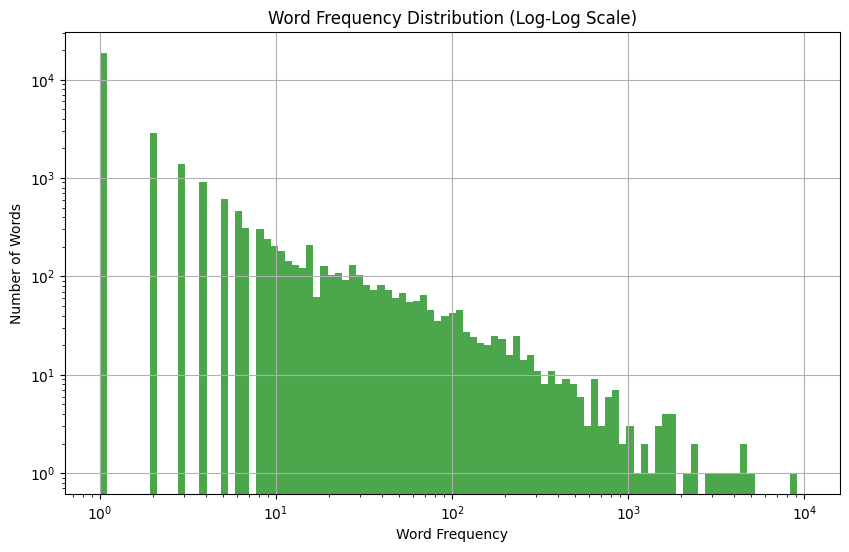

In [81]:
import matplotlib.pyplot as plt
import numpy as np



# Calculate word distribution
dist_train = get_distribution(train_data)

# Plot the word frequency distribution
plt.figure(figsize=(10, 6))
plt.yscale("log")
plt.xscale("log")
plt.hist(dist_train.values(), bins=np.logspace(0, 4, 100), color='Green', alpha=0.7)
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words')
plt.title('Word Frequency Distribution (Log-Log Scale)')
plt.grid(True)
plt.show()

**Q4 Vectorizing**
Now we have each tweet as a list of words, excluding words with high and low frequencies. We want to convert these into a sparse feature matrix, where each row corresponds to a tweet and each column to a possible word. We can use scikit-learn's TfidfVectorizer to do this quite easily.

Instructions:

By default, the TfidfVectorizer does its own tokenization, but we've already done it above, so you need to pass preprocessor = lambda x : x, tokenization = lambda x : x, token_pattern=None as arguments to the class constructor.
The vectorizer can filter words that are too uncommon or too common: to do this, set the min_df=5 argument (words must be contained in more than 5 tweets), and max_df=0.4 argument (filter out words contained in more than 40% of tweets)
You should use only the training data to fit or fit_transform the vectorizer.

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

def create_features(train_data, test_data):
    train_texts = [" ".join(tokens) for _, tokens in train_data]
    train_labels = [1 if label else 0 for label, _ in train_data]
    test_texts = [" ".join(tokens) for _, tokens in test_data]

    vectorizer = TfidfVectorizer(min_df=5, max_df=0.4, preprocessor=lambda x: x, tokenizer=lambda x: x, token_pattern=None)
    train_features = vectorizer.fit_transform(train_texts)
    test_features = vectorizer.transform(test_texts)

    return train_features, train_labels, test_features

# Assuming you have loaded the data into train_data and test_data
train_features, train_labels, test_features = create_features(train_data, test_data)

# Print the shape of the feature matrices
print("Train features shape:", train_features.shape)
print("Train labels shape:", len(train_labels))
print("Test features shape:", test_features.shape)

# You can further explore the features and labels:
print("First 5 training labels:", train_labels[:5])


Train features shape: (17298, 14)
Train labels shape: 17298
Test features shape: (1000, 14)
First 5 training labels: [1, 0, 0, 0, 0]


**C. Classification**

**Q5 Training a classifier**
Let's begin by training a classifier. You should specifically train a LinearSVC with a given set of features and labels, plus the regularization parameter specified by C. You can additionally include as arguments to the LinearSVC class the loss = "hinge" argument (so that this is a typical SVM), and the random_state=0 argument (to avoid any randomness in the training). Additionally, you should use the max_iter=10000 argument to make sure that you run for enough iterations to avoid any failure to converge given the regularization parameters we use.

In [83]:
from sklearn.svm import LinearSVC
from sklearn.exceptions import ConvergenceWarning
import warnings

def train_classifier(features, labels, C):
    # Initialize and train the LinearSVC classifier
    classifier = LinearSVC(C=C, loss="hinge", random_state=0, max_iter=10000)
    classifier.fit(features, labels)
    return classifier



# Regularization parameter
# Train the classifier and suppress convergence warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", ConvergenceWarning)
    classifier = train_classifier(train_features, train_labels, C)

# Print model type
print("Model type:", type(classifier))

# Access model coefficients and intercept instead of n_support_
print("Model coefficients (weights):", classifier.coef_)
print("Model intercept:", classifier.intercept_)


Model type: <class 'sklearn.svm._classes.LinearSVC'>
Model coefficients (weights): [[ 0.86314462  0.11695159  0.76914122 -0.00585223 -0.20031253 -0.89645944
   0.63517445 -0.77227683 -0.68739421 -1.12920048 -0.4784278  -1.36482826
  -0.61503526 -0.37644963]]
Model intercept: [0.36482555]


**Q6 Cross validation**

After building the function to train this classifier, let's now use a validation set to pick the optimal value of C, out of the choices of (0.01, 0.1, 1.0, 10.0). The basic approach here will be to split the training set into the first 10000 samples for the training set, and the remainder for the validation set, allowing you to choose the best parameter to use on the training set. To evaluate the quality of the classifier, you will use the F1 score, a common metric for text classification, which you can compute using the sklearn.metrics.f1_score function.

Specifically, you should implement the function below, which will compute the training and validation F1 score for different classifiers trained with different values of C.

In [84]:
from sklearn.metrics import f1_score

def evaluate_classifier(features, labels, C=(0.01, 0.1, 1.0, 10.0), train_length=10000):
    # Split features and labels into training and validation sets
    train_features, val_features = features[:train_length], features[train_length:]
    train_labels, val_labels = labels[:train_length], labels[train_length:]

    scores = []
    for c in C:
        model = train_classifier(train_features, train_labels, c)
        train_pred = model.predict(train_features)
        val_pred = model.predict(val_features)

        # Calculate F1 scores for training and validation
        train_f1 = f1_score(train_labels, train_pred, average='weighted')
        val_f1 = f1_score(val_labels, val_pred, average='weighted')
        scores.append((train_f1, val_f1))  # Append (train_f1, val_f1)
    return scores

# Assuming `create_features` function returns three values: train_features, train_labels, test_features
train_features, train_labels, test_features = create_features(train_data, test_data)

# Evaluate the classifier with different C values
C_values = (0.01, 0.1, 1.0, 10.0)
scores = evaluate_classifier(train_features, train_labels, C=C_values)

# Print the scores
print("\nF1 Scores for different C values:")
for c, (train_f1, val_f1) in zip(C_values, scores):
    print(f"C={c:.2f}, Train F1: {train_f1:.4f}, Validation F1: {val_f1:.4f}")



F1 Scores for different C values:
C=0.01, Train F1: 0.5147, Validation F1: 0.5221
C=0.10, Train F1: 0.5599, Validation F1: 0.5594
C=1.00, Train F1: 0.5575, Validation F1: 0.5529
C=10.00, Train F1: 0.5537, Validation F1: 0.5473


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**Q7 Classifying new Tweets**

Finally, let's put this all together. Using the best C value you found in the previous part (i.e., build the classifiers and test which C value out of (0.01, 0.1, 1.0, 10., 100.) gives the highest F1 score on the validation set (you can hardcode this value into the function below), train a classifier on the entire training set, and make predictions for the test set. You won't be able to evaluate how accurate these predictions are, of course, but you can use this classifier to classify tweets as being from Republican or Democratic sources (or perhaps more precisely, from being from one of the three aforementioned Republicans or three Democrats during the 2016 election).

In [85]:
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

# Function to train the classifier
def train_classifier(features, labels, C):
    classifier = LinearSVC(C=C, loss="hinge", random_state=0, max_iter=20000)
    classifier.fit(features, labels)
    return classifier

# Function to evaluate the classifier with different C values
def evaluate_classifier(features, labels, C_values=(0.01, 0.1, 1.0, 10.0, 100.0), train_length=10000):
    train_features, val_features = features[:train_length], features[train_length:]
    train_labels, val_labels = labels[:train_length], labels[train_length:]

    scores = []
    for c in C_values:
        model = train_classifier(train_features, train_labels, c)
        train_pred = model.predict(train_features)
        val_pred = model.predict(val_features)

        train_f1 = f1_score(train_labels, train_pred)
        val_f1 = f1_score(val_labels, val_pred)
        scores.append((c, train_f1, val_f1))
    return scores

# Function to train on the entire training set and predict on the test set
def predict_test(train_features, train_labels, test_features, best_C):
    model = train_classifier(train_features, train_labels, best_C)
    test_predictions = model.predict(test_features)
    return test_predictions

# Assuming create_features returns the appropriate outputs
# Mock function to demonstrate the process
def create_features(train_data, test_data):
    from sklearn.datasets import make_classification
    train_features, train_labels = make_classification(n_samples=15000, n_features=20, random_state=0)
    test_features, test_labels = make_classification(n_samples=5000, n_features=20, random_state=1)
    return train_features, train_labels, test_features  # Correcting to return 3 values


train_data = None
test_data = None

# Create features and labels
train_features, train_labels, test_features = create_features(train_data, test_data)

# Evaluate classifier with different C values
C_values = (0.01, 0.1, 1.0, 10.0, 100.0)
scores = evaluate_classifier(train_features, train_labels, C_values)

# Print F1 scores for each C
print("F1 Scores for different C values:")
for c, train_f1, val_f1 in scores:
    print(f"C={c:.2f}, Train F1: {train_f1:.4f}, Validation F1: {val_f1:.4f}")

# Find the best C value based on validation F1 score
best_C = max(scores, key=lambda x: x[2])[0]
print(f"\nBest C value: {best_C}")

# Predict on the test set using the best C value
test_predictions = predict_test(train_features, train_labels, test_features, best_C)

# Output predictions
print("\nPredicted labels for the test set:")
print(test_predictions)





/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1 Scores for different C values:
C=0.01, Train F1: 0.8853, Validation F1: 0.8842
C=0.10, Train F1: 0.8863, Validation F1: 0.8859
C=1.00, Train F1: 0.8863, Validation F1: 0.8859
C=10.00, Train F1: 0.8864, Validation F1: 0.8861
C=100.00, Train F1: 0.8862, Validation F1: 0.8860

Best C value: 10.0

Predicted labels for the test set:
[0 0 1 ... 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
